## To explore gym env

In [37]:
!pip install gym

In [38]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (984 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of 

In [39]:
import gym
import matplotlib.pyplot as plt
from gym import wrappers
%matplotlib inline

In [40]:
all_env = list(gym.envs.registry.all())
for env in list(all_env):
    print(env)

EnvSpec(Copy-v0)
EnvSpec(RepeatCopy-v0)
EnvSpec(ReversedAddition-v0)
EnvSpec(ReversedAddition3-v0)
EnvSpec(DuplicatedInput-v0)
EnvSpec(Reverse-v0)
EnvSpec(CartPole-v0)
EnvSpec(CartPole-v1)
EnvSpec(MountainCar-v0)
EnvSpec(MountainCarContinuous-v0)
EnvSpec(Pendulum-v0)
EnvSpec(Acrobot-v1)
EnvSpec(LunarLander-v2)
EnvSpec(LunarLanderContinuous-v2)
EnvSpec(BipedalWalker-v3)
EnvSpec(BipedalWalkerHardcore-v3)
EnvSpec(CarRacing-v0)
EnvSpec(Blackjack-v0)
EnvSpec(KellyCoinflip-v0)
EnvSpec(KellyCoinflipGeneralized-v0)
EnvSpec(FrozenLake-v0)
EnvSpec(FrozenLake8x8-v0)
EnvSpec(CliffWalking-v0)
EnvSpec(NChain-v0)
EnvSpec(Roulette-v0)
EnvSpec(Taxi-v3)
EnvSpec(GuessingGame-v0)
EnvSpec(HotterColder-v0)
EnvSpec(Reacher-v2)
EnvSpec(Pusher-v2)
EnvSpec(Thrower-v2)
EnvSpec(Striker-v2)
EnvSpec(InvertedPendulum-v2)
EnvSpec(InvertedDoublePendulum-v2)
EnvSpec(HalfCheetah-v2)
EnvSpec(HalfCheetah-v3)
EnvSpec(Hopper-v2)
EnvSpec(Hopper-v3)
EnvSpec(Swimmer-v2)
EnvSpec(Swimmer-v3)
EnvSpec(Walker2d-v2)
EnvSpec(Walker2d

for rendering

In [41]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [42]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [43]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only


import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [44]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [45]:
!pip install pyglet==1.5.11

     |████████████████████████████████| 1.1 MB 9.6 MB/s 
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires pyglet<=1.5.0,>=1.4.0, but you have pyglet 1.5.11 which is incompatible.


## Exploring OpenAI Gym Environments

In [46]:
"""
import gym
env = gym.make("LunarLander-v2")
observation, info = env.reset(seed=42, return_info=True)
for _ in range(1000):
    env.render()
    action = policy(observation)
    observation, reward, done, info = env.step(action)

    if done:
        observation, info = env.reset(return_info=True)
env.close()
"""

'\nimport gym\nenv = gym.make("LunarLander-v2")\nobservation, info = env.reset(seed=42, return_info=True)\nfor _ in range(1000):\n    env.render()\n    action = policy(observation)\n    observation, reward, done, info = env.step(action)\n\n    if done:\n        observation, info = env.reset(return_info=True)\nenv.close()\n'

Action space: Discrete(2)
Observation space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


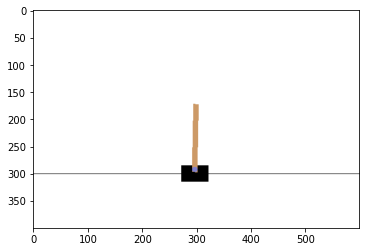

In [47]:
import gym
import pyglet
env = gym.make('CartPole-v1')
env.reset()
plt.imshow(env.render('rgb_array'))
print("Action space:",env.action_space)
print("Observation space:",env.observation_space)

In [95]:
import urllib.request
urllib.request.urlretrieve('http://www.atarimania.com/roms/Roms.rar','Roms.rar')
!pip install unrar
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip   rars
!mv ROMS.zip  rars
!python -m atari_py.import_roms rars


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC ROMS/BY ALPHABET (PAL)/

In [94]:
!pip install gym[box2d]

SyntaxError: ignored

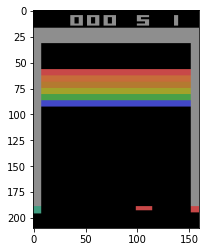

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(4)
['NOOP', 'FIRE', 'RIGHT', 'LEFT']


In [96]:
env = gym.make('Breakout-v0')

plt.imshow(env.render('rgb_array'))
plt.show()
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print(env.env.get_action_meanings())

## Implementing DQN & Solving grid-world environment

## Deterministic Env

In [7]:
import gym
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt
from google.colab import widgets
import time

In [8]:
grid = np.zeros((4,4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
grid = np.zeros((4, 4))
pos1 = [0, 0]
pos2 = [3, 3]

reward1 = [0,3]
reward2 = [1,3]
reward3 = [2,2]
reward4 = [3,2]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5
grid[tuple(reward1)] = 0.25
grid[tuple(reward2)] = 0.25
grid[tuple(reward3)] = 0.25
grid[tuple(reward4)] = 0.25

print(grid)

[[1.   0.   0.   0.25]
 [0.   0.   0.   0.25]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.25 0.5 ]]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

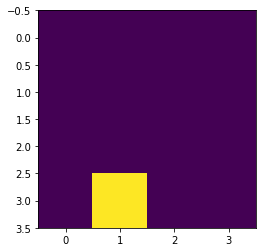

<IPython.core.display.Javascript object>

In [10]:
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
  grid[np.random.randint(4), np.random.randint(4)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [82]:
class DGridEnvironment(gym.Env):
    metadata = {'render.modes': []}
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timestep = 50000
        self.rewards = [[0,3],[1,3],[2,2],[3,2]]
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.goal_pos = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        for i in self.rewards :
          self.state[tuple(i)] = 0.25
        observation = self.agent_pos #I changed it self.state.flatten() to self.agent_pos to use it in algorithm
        return observation
    
    def step(self, action):
        if action == 0:           
          self.agent_pos[0] += 1 #down
          if self.agent_pos[0] > 3:
            self.agent_pos[0] = 3 
        if action == 1:           
          self.agent_pos[0] -= 1 #up
          if self.agent_pos[0] < 0:
            self.agent_pos[0] = 0 
        if action == 2:
          self.agent_pos[1] += 1 #right
          if self.agent_pos[1] > 3:
            self.agent_pos[1] = 3
        if action == 3:
          self.agent_pos[1] -= 1 #left
          if self.agent_pos[1] < 0:
            self.agent_pos[1] = 0  

        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        for i in self.rewards :
          self.state[tuple(i)] = 0.25
        observation = self.agent_pos #I changed it self.state.flatten() to self.agent_pos to use it in algorithm
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
          reward = 10
        elif (self.agent_pos == self.rewards[0]).all():
          reward = 2
        elif (self.agent_pos == self.rewards[1]).all():
          reward = 4
        elif (self.agent_pos == self.rewards[2]).all():
          reward = 6
        elif (self.agent_pos == self.rewards[3]).all():
          reward = 8
        else:
          reward = -1
        
        self.timestep += 1
        done = True if self.timestep >= self.max_timestep or (self.agent_pos == self.goal_pos).all() else False
        info = {}
        
        return observation, reward, done, info
        
    def render(self):
        plt.imshow(self.state)

In [66]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

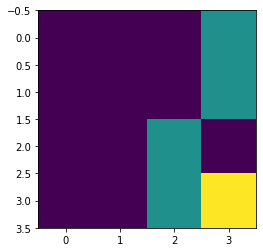

<IPython.core.display.Javascript object>

In [83]:
env = DGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


for i in range(100):
  action = agent.step(obs)
  obs, reward, done, _= env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()

## DQN

In [8]:
"""
initialize replay memory D
initialize action-value function Q with random weights
observe initial state s
repeat
  select an action a
    with probability e select a random action
    otherwise select a = argmax a' Q(s,a')
  carry out action a 
  observe reward r and new state s'
  store experience <s,a,r,s'> in replay memory D

  sample random transitions <ss,aa,rr,ss'> from replay memory
  calculate target for each minibatch transition
    if ss' is terminal state then tt = rr
    otherwise tt = rr + gamma*max a' Q(ss',aa')
  train the Q network using (tt-Q(ss,aa))^2 as loss

  s = s'

until terminated
"""

"\ninitialize replay memory D\ninitialize action-value function Q with random weights\nobserve initial state s\nrepeat\n  select an action a\n    with probability e select a random action\n    otherwise select a = argmax a' Q(s,a')\n  carry out action a \n  observe reward r and new state s'\n  store experience <s,a,r,s'> in replay memory D\n\n  sample random transitions <ss,aa,rr,ss'> from replay memory\n  calculate target for each minibatch transition\n    if ss' is terminal state then tt = rr\n    otherwise tt = rr + gamma*max a' Q(ss',aa')\n  train the Q network using (tt-Q(ss,aa))^2 as loss\n\n  s = s'\n\nuntil terminated\n"

In [4]:
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque

In [86]:
rewards = []
epsilon_decay = []
episode_list = []
episode = 500
D = deque(maxlen=5000)

#parameter
decay = 0.99
epsilon = 1
alpha = 0.001
gamma = 0.9
num_batch = 256
weight = 256

In [14]:
env = DGridEnvironment()
observation_space = env.observation_space.n
action_space = env.action_space.n

model = nn.Sequential(
    nn.Linear(2,weight), 
    nn.ReLU(),
    nn.Linear(weight,action_space))

optimizer = optim.Adam(model.parameters(),alpha)

--------------------------------
episode: 10
epsilon: 0.9043820750088043
rewards: 0
--------------------------------
episode: 20
epsilon: 0.8179069375972307
rewards: 0
--------------------------------
episode: 30
epsilon: 0.7397003733882802
rewards: 0
--------------------------------
episode: 40
epsilon: 0.6689717585696803
rewards: 0
--------------------------------
episode: 50
epsilon: 0.6050060671375365
rewards: 0
--------------------------------
episode: 60
epsilon: 0.5471566423907612
rewards: 0
--------------------------------
episode: 70
epsilon: 0.49483865960020695
rewards: 0
--------------------------------
episode: 80
epsilon: 0.44752321376381066
rewards: 0
--------------------------------
episode: 90
epsilon: 0.4047319726783239
rewards: 0
--------------------------------
episode: 100
epsilon: 0.36603234127322926
rewards: 0
--------------------------------
episode: 110
epsilon: 0.33103308832101386
rewards: 0
--------------------------------
episode: 120
epsilon: 0.2993803913123

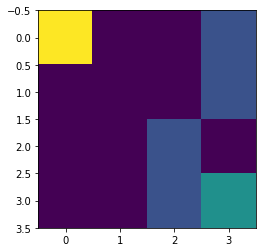

In [87]:
#repeat for each episode 
for ep in range(1,episode+1):
  
  #initialize replay memory D
  D = []
  #observe the initial state s 
  state = env.reset()
  env.render()
  
  done = False
  epsilon = epsilon * decay
  

  cumulative_rewards = 0
  #repeat for each step of episode
  while not done:
    
    state_torch = torch.FloatTensor([state])
    #select an action a from state s(e.g. epsilon-greedy) and execute it
    if np.random.random() < epsilon: 
      action = torch.LongTensor([np.random.choice(action_space)]) #exploration 

    else:
      action = model(state_torch).detach().max(1)[1] #exploit
   
    #Receive immediate reward r, Observe the new state s'
    next_state, reward, done, _ = env.step(action)
    
    #store experience <s,a,r,s'> in replay memory D
    D.append((state_torch,action,torch.FloatTensor([reward]),torch.FloatTensor([next_state])))

    #learning - train NN
    #sample random transitions <ss,aa,rr,ss'> from replay memory
    if len(D) >= num_batch : 
      #calculate target for each minibatch transition
      batch = random.sample(D, num_batch)
      ss, aa, rr, ss_dash = zip(*batch)
  
      ss = torch.cat(ss)
      aa = torch.cat(aa)
      rr = torch.cat(rr)
      ss_dash = torch.cat(ss_dash)

      #if ss' is terminal state then tt = rr
      if done:
        target = rr
      #otherwise tt = rr + gamma*max a' Q(ss',aa')
      else:
        target = rr + gamma * model(ss_dash).detach().max(1)[0]
        
      #train the Q network using (tt-Q(ss,aa))^2 as loss

      loss_func = nn.MSELoss()
      output = torch.gather(model(ss),1,aa.unsqueeze(axis=-1)).squeeze()
      loss = loss_func(output,target)


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      cumulative_rewards+=reward
      state = next_state


  if (ep)%10== 0 : 
    print("--------------------------------")  
    print('episode:',ep)
    print('epsilon:',epsilon)
    print('rewards:',cumulative_rewards)

        
  episode_list.append(ep)
  epsilon_decay.append(epsilon)
  rewards.append(cumulative_rewards)
      
  
env.close()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

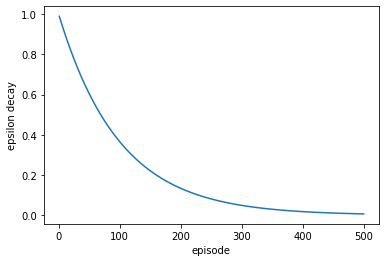

<IPython.core.display.Javascript object>

In [88]:
import matplotlib.pyplot as plt
#epsilon decay per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,epsilon_decay)
  plt.xlabel("episode")
  plt.ylabel("epsilon decay")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

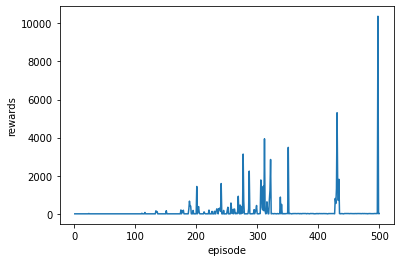

<IPython.core.display.Javascript object>

In [89]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(episode_list,rewards)
  plt.xlabel("episode")
  plt.ylabel("rewards")

Evaluation

In [97]:
class GreedyAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space
    self.weight = 256

  def model(self,state):
    self.model = nn.Sequential(
      nn.Linear(2,weight), 
      nn.ReLU(),
      nn.Linear(weight,action_space))

  def step(self, observation):
    state= torch.FloatTensor([observation])
    return model(state).detach().max(1)[1]

In [99]:
env = DGridEnvironment()
agent = GreedyAgent(env)

ev_result = []
ev_ep = []
episode = 5

for ep in range (1,episode+1):
  obs = env.reset()
  done = False
  cumulative_rewards = 0 
  while not done: 
    action = agent.step(obs)
    obs, reward, done, _= env.step(action)
    
    cumulative_rewards+=reward
    state = next_state
    
  print("--------------------------------")  
  print('episode:',ep)
  print('rewards:',cumulative_rewards)

      
  ev_ep.append(ep)
  ev_result.append(cumulative_rewards)

--------------------------------
episode: 1
rewards: 349975
--------------------------------
episode: 2
rewards: 349975
--------------------------------
episode: 3
rewards: 349975
--------------------------------
episode: 4
rewards: 349975
--------------------------------
episode: 5
rewards: 349975


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

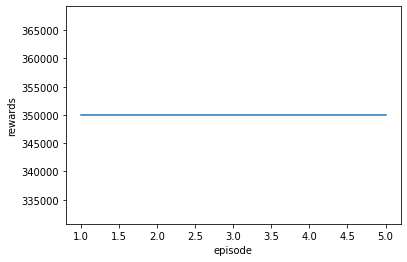

<IPython.core.display.Javascript object>

In [100]:
#rewards per episode 
with output_grid.output_to(0, 0):
  plt.plot(ev_ep,ev_result)
  plt.xlabel("episode")
  plt.ylabel("rewards")